In [1]:
from eight_puzzle_problem import State, visualize
import matplotlib.pyplot as plt


def Hill_Climbing(origin, destination, cost_fn):
    costs = [cost_fn(origin)]
    current = origin
    route = [current]
    neighbours = current.expand()
    shortest = min(neighbours, key=lambda s: cost_fn(s))
    costs.append(cost_fn(shortest))
    route.append(shortest)

    while cost_fn(shortest) < cost_fn(current):
        current = shortest
        neighbours = current.expand()
        shortest = min(neighbours, key=lambda s: cost_fn(s))
        costs.append(cost_fn(shortest))
        route.append(shortest)
        if shortest == destination:
            break

    return route, costs


In [2]:
def misplaced_tiles(state: State):
    flat = state.flatten()
    goal = range(len(flat))
    return sum([0 if goal[i] == flat[i] else 1 for i in range(len(flat))])


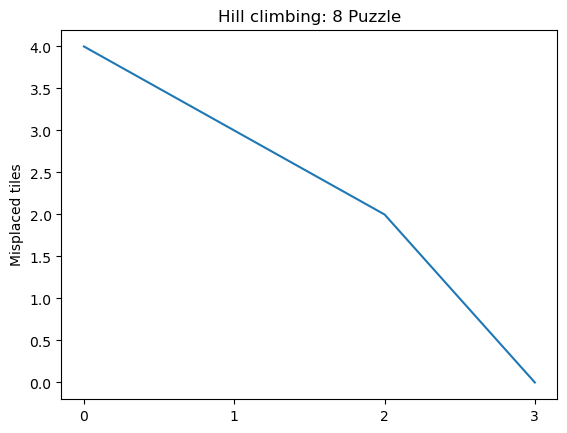

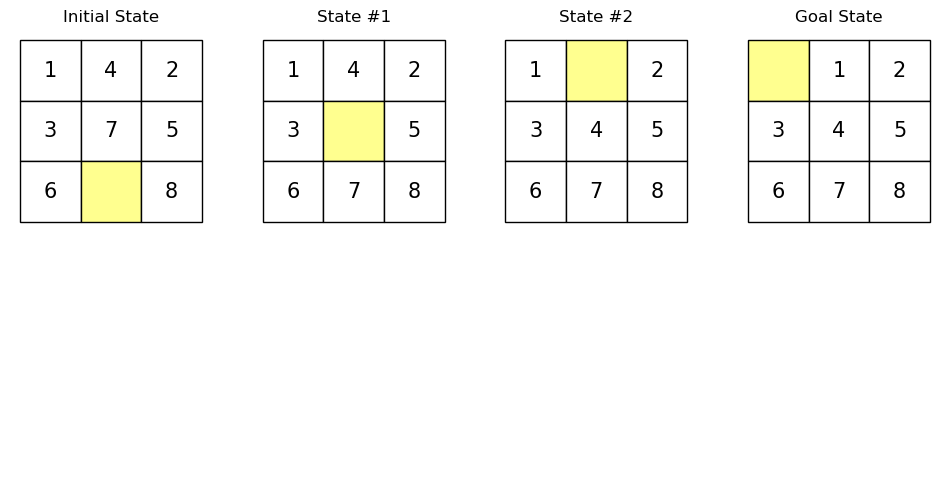

In [3]:
init_state = [[1,4,2],
              [3,7,5],
              [6,0,8]]

goal_state = [[0,1,2],
              [3,4,5],
              [6,7,8]]


init_state = State(init_state)
goal_state = State(goal_state)


# Check if there's even a solution
if not init_state.is_solvable():
    print("This puzzle is not solvable.")
else:
    # The actual solution
    solution, costs = Hill_Climbing(init_state, goal_state, misplaced_tiles)
    plt.xticks(range(len(costs)))
    plt.ylabel("Misplaced tiles")
    plt.title("Hill climbing: 8 Puzzle")
    plt.plot(costs)
    visualize(solution)